In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold

In [3]:
df1 = pd.read_csv('../filtered_data/Dataset1_Parking_Data.csv')
df2 = pd.read_csv('../filtered_data/Dataset2.csv')
df1.dropna()
df2.dropna()

,Unnamed: 0,hour,dow,month,latitude,longitude,label
0,0,21,6,8,37.786852,-122.401262,1
1,1,22,5,8,37.727457,-122.427302,1
2,2,13,5,8,37.776333,-122.394035,1
3,3,10,5,8,37.718674,-122.443302,1
4,4,16,4,8,37.734823,-122.387382,1
...,...,...,...,...,...,...,...
100431,100431,23,1,7,37.785383,-122.476701,0
100432,100432,18,3,9,37.801169,-122.460813,0
100433,100433,20,4,7,37.761669,-122.473868,0
100434,100434,23,5,2,37.717501,-122.379571,0


In [4]:
df1.shape

(162234, 7)

In [5]:
df2.head()

,Unnamed: 0,hour,dow,month,latitude,longitude,label
0,0,21,6,8,37.786852,-122.401262,1
1,1,22,5,8,37.727457,-122.427302,1
2,2,13,5,8,37.776333,-122.394035,1
3,3,10,5,8,37.718674,-122.443302,1
4,4,16,4,8,37.734823,-122.387382,1


In [6]:
len(df1[df1['label'] == 0])/len(df1[df1['label'] == 1])

6.038656774697384

In [7]:
len(df2[df2['label'] == 0])/len(df2[df2['label'] == 1])

6.0

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [10]:
def split(data):
    data= data.sample(frac=1)
    X = data.iloc[:,:-1]
    y = data.iloc[:,-1]
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)
    return (X_train,X_test,y_train,y_test)

In [11]:
df1.drop('Unnamed: 0', axis=1,inplace=True)
df2.drop('Unnamed: 0', axis=1,inplace=True)

In [12]:
df1_X_train, df1_X_test, df1_y_train, df1_y_test = split(df1)
df2_X_train, df2_X_test, df2_y_train, df2_y_test = split(df2)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

def model(X_train,y_train):
    lr = LogisticRegression(solver='lbfgs')
    nb = GaussianNB()
    dt = DecisionTreeClassifier(max_depth =10)
    rf = RandomForestClassifier(n_estimators =2)
    
    lr.fit(X_train, y_train)
    nb.fit(X_train, y_train)
    dt.fit(X_train, y_train)
    rf.fit(X_train, y_train)
    
    return (lr, nb, dt, rf)

def evaluate(X_test, y_test, model, model_name):
    prob = model.predict_proba(X_test)
    y_pred = prob[:, 1]
    auc = roc_auc_score(y_test, y_pred)
    print(model_name, auc)
    return (y_pred)

def evaluate_no_auc(X_test, y_test, model, model_name):
    pred = model.predict(X_test)
#     auc = roc_auc_score(y_test, y_pred)
#     print(model_name, auc)
    return (pred)

In [135]:
16224 + 16224 + 16224 + 16224 + 16223 + 16223 + 16223 + (16223*3)

162234

In [14]:
len(validation_dataset1['lr']['fpr'])

NameError: name 'validation_dataset1' is not defined

In [132]:
y.shape

(162234,)

In [15]:
lr_df1, nb_df1, dt_df1, rf_df1 = model(df1_X_train, df1_y_train)
lr_df2, nb_df2, dt_df2, rf_df2 = model(df2_X_train, df2_y_train)

In [16]:
model_list_1 = [lr_df1, nb_df1, dt_df1, rf_df1]
model_name_1 = ['Logistic Regression-1', 'Naive Bayes-1', 'Decision Tree-1', 'Random Forest-1']

model_list_2 = [lr_df2, nb_df2, dt_df2, rf_df2]
model_name_2 = ['Logistic Regression-2', 'Naive Bayes-2', 'Decision Tree-2', 'Random Forest-2']

In [17]:
validated_df1 = {}
validated_df2 = {}

#Trained on df1 and validated on df1
for model, name in zip(model_list_1, model_name_1):
    validated_df1[name] = evaluate(df1_X_test, df1_y_test, model, name)

Logistic Regression-1 0.5898298606518475
Naive Bayes-1 0.6360270793534243
Decision Tree-1 0.7686820157262816
Random Forest-1 0.8791425420899441


In [18]:
#Trained on df2 and validated on df1
for model, name in zip(model_list_2, model_name_2):
    validated_df1[name] = evaluate(df1_X_test, df1_y_test, model, name)

Logistic Regression-2 0.578829456683317
Naive Bayes-2 0.59626025867084
Decision Tree-2 0.6498744168358545
Random Forest-2 0.6789319975625311


In [19]:
#Trained on df2 and validated on df2
for model, name in zip(model_list_2, model_name_2):
    validated_df2[name] = evaluate(df2_X_test, df2_y_test, model, name)

Logistic Regression-2 0.6620097737131304
Naive Bayes-2 0.7085330807356283
Decision Tree-2 0.7711165370826631
Random Forest-2 0.6454718800711938


In [20]:
#Trained on df1 and validated on df2
for model, name in zip(model_list_1, model_name_1):
    validated_df2[name] = evaluate(df2_X_test, df2_y_test, model, name)

Logistic Regression-1 0.6183421103827169
Naive Bayes-1 0.6902817174896755
Decision Tree-1 0.6211773284090587
Random Forest-1 0.5956792706800244


In [21]:
df1_test_positive = df1_X_test.loc[df1_y_test == 1, :]
df2_test_positive = df2_X_test.loc[df2_y_test == 1, :]

In [22]:
validated_df1_positve = {}
validated_df2_positve = {}

In [23]:
#Trained on df1 and validated on df1_positive
for model, name in zip(model_list_1, model_name_1):
    validated_df1_positve[name] = evaluate_no_auc(df1_test_positive, [1]*len(df1_test_positive), model, name)

In [89]:
#Trained on df2 and validated on df1_positive
for model, name in zip(model_list_2, model_name_2):
    validated_df1_positve[name] = evaluate_no_auc(df1_test_positive, [1]*len(df1_test_positive), model, name)

In [90]:
#Trained on df2 and validated on df2_positive
for model, name in zip(model_list_2, model_name_2):
    validated_df2_positve[name] = evaluate_no_auc(df2_test_positive, [1]*len(df2_test_positive), model, name)

In [91]:
#Trained on df1 and validated on df2_positive
for model, name in zip(model_list_1, model_name_1):
    validated_df2_positve[name] = evaluate_no_auc(df2_test_positive, [1]*len(df2_test_positive), model, name)

In [92]:
def plot_roc(y_test, validated, title):
    
    ns_probs = [0 for _ in range(len(y_test))]
    ns_fpr, ns_tpr, _ =  roc_curve(y_test, ns_probs)
    
    fig = plt.figure(figsize=(6,6), dpi=100)
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Default')

    for model in validated:
        fpr, tpr, _ = roc_curve(y_test, validated[model])
        plt.plot(fpr, tpr, label= model)
    
    plt.title(title)
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

In [93]:
validated_df1

{'Logistic Regression-1': array([0.18965449, 0.13819064, 0.10416377, ..., 0.09792777, 0.12072482,
        0.19853861]),
 'Naive Bayes-1': array([0.21798242, 0.17079079, 0.14074307, ..., 0.10598192, 0.09215831,
        0.19204216]),
 'Decision Tree-1': array([0.06606013, 0.02325581, 0.11303861, ..., 0.18293471, 0.12426036,
        0.18685121]),
 'Random Forest-1': array([1. , 0. , 0.5, ..., 0.5, 0. , 0. ]),
 'Logistic Regression-2': array([0.30244409, 0.17665417, 0.12994311, ..., 0.10664758, 0.16522672,
        0.34022619]),
 'Naive Bayes-2': array([0.36742151, 0.24850694, 0.17117821, ..., 0.10567845, 0.17119395,
        0.38871632]),
 'Decision Tree-2': array([0.1986532 , 0.28450106, 0.32107023, ..., 0.32107023, 0.28450106,
        0.1986532 ]),
 'Random Forest-2': array([0. , 0. , 0. , ..., 1. , 0.5, 0. ])}

In [94]:
# del validated_df1['Random Forest-1']
# del validated_df1['Random Forest-2']
# del validated_df2['Random Forest-1']
# del validated_df2['Random Forest-2']

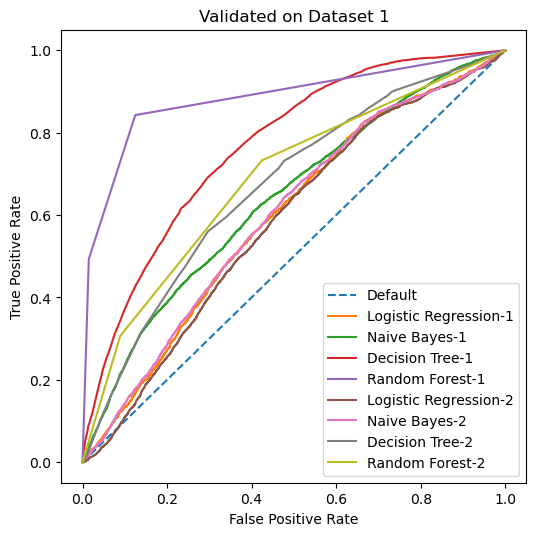

In [95]:
plot_roc(df1_y_test, validated_df1, 'Validated on Dataset 1')

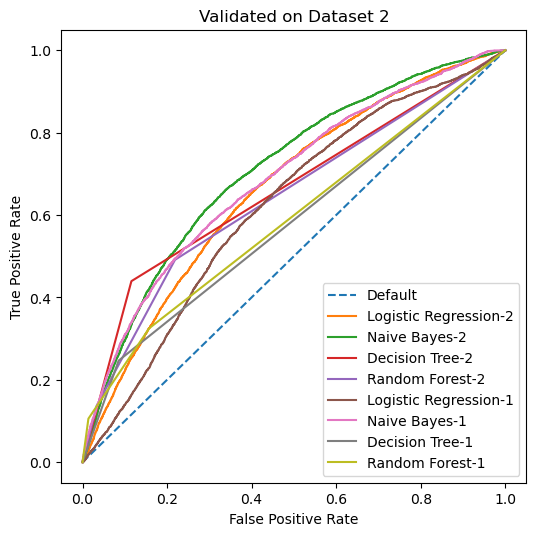

In [78]:
plot_roc(df2_y_test, validated_df2, 'Validated on Dataset 2')

In [96]:
def compute_accuracy(validated_positive):
    for model in validated_positive:
        print(model+": "+ (str)(np.sum(validated_positive[model] == 1)/len(validated_positive[model])))

In [97]:
compute_accuracy(validated_df1_positve)

Logistic Regression-1: 0.0
Naive Bayes-1: 0.0
Decision Tree-1: 0.06929837199250828
Random Forest-1: 0.4933006771358594
Logistic Regression-2: 0.0
Naive Bayes-2: 0.0
Decision Tree-2: 0.1348508860394756
Random Forest-2: 0.30629592277769774


In [98]:
compute_accuracy(validated_df2_positve)

Logistic Regression-2: 0.0
Naive Bayes-2: 0.0
Decision Tree-2: 0.08261976394353159
Random Forest-2: 0.1342281879194631
Logistic Regression-1: 0.0
Naive Bayes-1: 0.0
Decision Tree-1: 0.02568849803286276
Random Forest-1: 0.1254339273316362


In [127]:
## Cross validation for df1
x1 = df1.iloc[:, :-1]
y1 = df1.iloc[:,-1]

cv = StratifiedKFold(n_splits=10,shuffle=False)

def model_cv(x, y):
    lr = LogisticRegression(solver='lbfgs')
    nb = GaussianNB()
    dt = DecisionTreeClassifier(max_depth =10)
    rf = RandomForestClassifier(n_estimators =10, max_depth=10)
    
    model_list = [lr, nb, dt, rf]
    model_name = ['lr', 'nb', 'dt', 'rf']
    validation = {}
    
    
    for idx,model in enumerate(model_list):
        print(model_name[idx])
        if model_name[idx] not in validation:
            validation[model_name[idx]] = {
                'fpr' :[],
                'tpr':[],
                'pred':[],
                'y_test':[]
            }
        clf = model
        
        ## appending tpr and fpr for each model
        for train,test in cv.split(x,y):
            prediction = clf.fit(x.iloc[train,:],y.iloc[train]).predict_proba(x.iloc[test,:])
            validation[model_name[idx]]['pred'].extend(list(prediction[:, 1]))
            validation[model_name[idx]]['y_test'].extend(list(y[test]))
        fpr, tpr, t = roc_curve(validation[model_name[idx]]['y_test'], validation[model_name[idx]]['pred'])
        validation[model_name[idx]]['fpr'].extend(fpr)
        validation[model_name[idx]]['tpr'].extend(tpr)
            
    ## returns a dict containing fpr and tpr for 4 models.
    return validation

In [128]:
validation_dataset1 = model_cv(x,y)

lr
nb
dt
rf


In [133]:
x2 = df2.iloc[:, -3:-1]
y2 = df2.iloc[:, -1]
validation_dataset2 = model_cv(x2,y2)

lr
nb
dt
rf


In [146]:
def plot_roc_cv(validation):
    
#     ns_probs = [0 for _ in range(len(df1))]
#     ns_fpr, ns_tpr, _ =  roc_curve(y_test, ns_probs)
    
#     fig = plt.figure(figsize=(6,6), dpi=100)
#     plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Default')

    for model in validation:
        print(model)
        fpr = validation[model]['fpr']
        tpr = validation[model]['tpr']
        print(len(fpr),len(tpr))
        plt.plot(fpr, tpr, label= model)
    
    plt.title('Cross Validation ROC')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

lr
31313 31313
nb
41539 41539
dt
2049 2049
rf
39958 39958


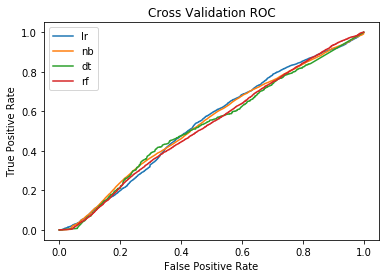

In [147]:
plot_roc_cv(validation_dataset1)

lr
19806 19806
nb
19487 19487
dt
1198 1198
rf
26743 26743


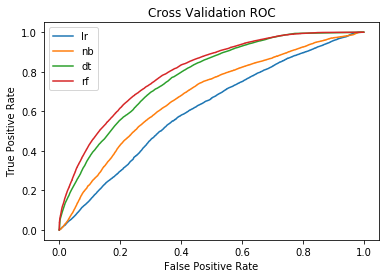

In [148]:
plot_roc_cv(validation_dataset2) # only using lat long

lr
23440 23440
nb
22916 22916
dt
1747 1747
rf
28843 28843


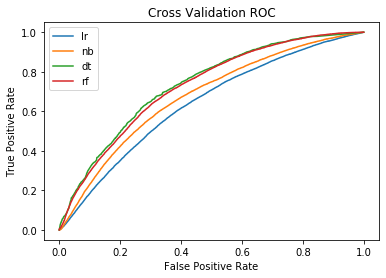

In [132]:
plot_roc_cv(validation_dataset2)  # all features

In [115]:
from sklearn.feature_selection import RFECV

rfe = RFECV(DecisionTreeClassifier(max_depth=10)).fit(x2, y2)

In [116]:
rfe.ranking_

array([2, 4, 3, 1, 1])

In [117]:
rfe.support_   # means latitude and longitude

array([False, False, False,  True,  True])

In [119]:
rfe1 = RFECV(DecisionTreeClassifier(max_depth=10)).fit(x1, y1)

In [120]:
rfe1.ranking_

array([1, 1, 1, 1, 1])

In [167]:
import math
def plot_log_roc_cv(validation):
    for model in validation:
        print(model)
        tnr = [1-x for x in validation[model]['fpr']]
        fnr = [math.log10(1-x+1e-10) for x in validation[model]['tpr']]
        print(len(fnr),len(tnr))
        plt.plot(fnr, tnr, label= model)
    
    plt.title('Cross Validation ROC')
    # axis labels
    plt.xlabel('False Negative Rate')
    plt.xticks(range(-10, 1,  2), [math.pow(10, e)for e in range(-10, 1, 2)])
    plt.ylabel('True Negative Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

lr
19806 19806
nb
19487 19487
dt
1198 1198
rf
26743 26743


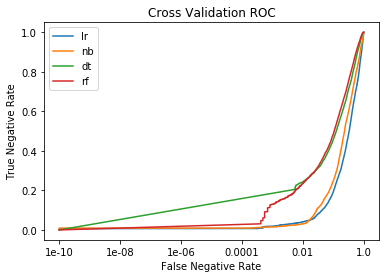

In [168]:
plot_log_roc_cv(validation_dataset2)